In [2]:
# these are our usual librairies
# be sure that these load properly
# if they don't, you may have to install the libraries
# recall that you can install them using commands similar to:
# !pip install pandas
# !pip install statsmodels
import pandas as pd
import statsmodels.api as sm

In [3]:
# be sure to have the csv file collegeadmissions.csv in the same directory as this ipynb
df = pd.read_csv("~/Desktop/collegeadmissions.csv")

In [7]:
df.head()
df.describe()

,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,1169.000000,1182.000000,1182.000000,714.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,578.297690,480.514382,588.311337,470.931373,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,70.169391,72.464475,71.871189,79.670620,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,360.000000,280.000000,410.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,530.000000,430.000000,540.000000,416.250000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,570.000000,470.000000,580.000000,450.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,620.000000,510.000000,630.000000,510.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,800.000000,770.000000,800.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


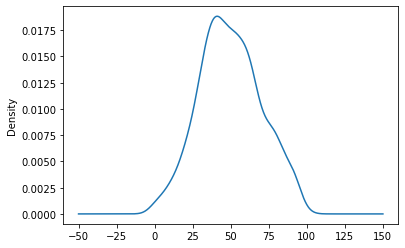

In [4]:
# let's start with an understanding of the dependent variable
# Graduation rate - Bachelor degree within 5 years, total
df["Graduation rate - Bachelor degree within 5 years, total"].plot.kde()

In [9]:
# here is a simple OLS
YVar = df[["Graduation rate - Bachelor degree within 5 years, total"]]
XVar = df[['Applicants total',
         'ACT Composite 75th percentile score']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                                               OLS Regression Results                                              
Dep. Variable:     Graduation rate - Bachelor degree within 5 years, total   R-squared:                       0.638
Model:                                                                 OLS   Adj. R-squared:                  0.638
Method:                                                      Least Squares   F-statistic:                     1052.
Date:                                                     Tue, 27 Oct 2020   Prob (F-statistic):          6.34e-264
Time:                                                             15:03:19   Log-Likelihood:                -4587.5
No. Observations:                                                     1195   AIC:                             9181.
Df Residuals:                                                         1192   BIC:                             9196.
Df Model:                                                               

In [ ]:
# Let's plot the residuals to see how they are distributed
LinearModel.resid.plot.kde()

In [ ]:
# let's take a look at the residuals after mapping them to the names
# of the colleges or universities
residuals = pd.concat([df['name'], LinearModel.resid], axis=1)
residuals.sort_values(by=[0])